# 085.PCA (Principal Component Analysis)

- PCA는 Karl Pearson이 1901 년에 발명한 통계 기법으로 직교 변환을 사용하여 변수 집합을 주성분이라고 하는 선형적으로 상관되지 않은 변수 집합으로 매핑.

- PCA는 원래 데이터세트의 공분산 행렬의 SVD(Singular Value Decomposition)를 기반으로 한다. 이러한 분해(decomposition)의 고유 벡터는 회전변환 행렬(rotation matrix)로 사용된다. 고유 벡터는 설명된 분산에 따라 내림차순으로 회전변환 행렬에 배열.

- PCA는 단순한 공간 변환, 차원 감소 및 스펙트럼 정보로부터의 혼합물 분리에 이르기까지 다양한 응용 분야에서 강력한 기술로 사용


- "ChurnData.csv"의 각 행은 고객을 나타내고 각 열은 고객의 속성 표시

- 데이터 세트에는 지난달에 탈회한 고객에 대한 정보가 포함 (Churn 1.0 - 탈회, 0.0 - 유지)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
churn_df = pd.read_csv("datasets/ChurnData.csv")

In [3]:
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [4]:
A = np.array(churn_df.values)
A.shape

(200, 28)

In [5]:
columns = churn_df.columns[:-1]
columns.size

27

In [6]:
X = churn_df.loc[:, columns]
y = churn_df['churn']

In [7]:
# train / test dataset split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
print(X_train.shape)
print(X_test.shape)

(160, 27)
(40, 27)


### PCA 적용 전 Logistic Regression

- PCA 적용 후의 결과와 비교 목적

In [10]:
# Fitting Logistic Regression
clf = LogisticRegression(solver='lbfgs', random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [11]:
# predict test set
y_pred = clf.predict(X_test)
# Confusion matrix
accuracy_score(y_test, y_pred)

0.775

### PCA 적용

- 27 개의 feature 를 2 개로 차원 축소  


- components_
    - array, shape (n_components, n_features)
    - n_feature dimension 공간에서의 주성분 축  
    - data 의 분산을 최대로 보존하는 방향
    - explained_variance_ 에 순서대로 정렬되어 있음
    
- explained_variance_  
    - shape (n_components,)  
    - 선택한 각 구성 요소에서 설명하는 분산의 양  
    
- explained_variance_ratio_   
    - shape (n_components,)
    - 선택한 각 구성 요소가 설명하는 분산의 백분율입니다.

In [12]:
# Apply kernel PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)                # 2 개 component 로 차원 축소

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [13]:
print("차원 축소된 X_train :", X_train_pca.shape)
print("차원 축소된 X_test :", X_test_pca.shape)

차원 축소된 X_train : (160, 2)
차원 축소된 X_test : (40, 2)


In [14]:
print(pca.components_.shape)
print("첫번째 주성분(고유벡터) :")
print(pca.components_[0])
print("두번째 주성분(고유벡터) :")
print(pca.components_[1])
print()
print('설명된 분산(고유값)의 비율: {}, 두 성분의 합: {:.2f}'
      .format(pca.explained_variance_ratio_,sum(pca.explained_variance_ratio_)))

(2, 27)
첫번째 주성분(고유벡터) :
[0.18870382 0.09407626 0.06999421 0.02405283 0.08039882 0.10532452
 0.0913006  0.22012759 0.24022929 0.17035807 0.26783154 0.16389682
 0.25017627 0.28326203 0.17638143 0.27435707 0.22993114 0.24062665
 0.26112415 0.0747603  0.22729268 0.21587761 0.06959358 0.17457864
 0.17900112 0.07082588 0.29324012]
두번째 주성분(고유벡터) :
[ 0.2917276   0.18411246  0.24507417  0.04409899 -0.16349343  0.2142686
 -0.23252316  0.07599265 -0.23520159  0.29224485 -0.06742566 -0.24108039
  0.12944092 -0.20861384  0.29806582  0.04425842  0.22376079 -0.18866967
 -0.17737835 -0.24830636 -0.0674659  -0.05215805 -0.21541163  0.28738933
  0.03136523  0.07488121 -0.10196478]

설명된 분산(고유값)의 비율: [0.25193472 0.21764464], 두 성분의 합: 0.47


In [15]:
# Fitting Logistic Regression
clf = LogisticRegression(solver='lbfgs', random_state=0)
clf.fit(X_train_pca, y_train)

LogisticRegression(random_state=0)

In [16]:
# predict test set
y_pred = clf.predict(X_test_pca)
y_pred

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [17]:
# Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.725

## 차원 축소된 churn data 시각화
- 27 개의 feature 가 2 개의 PCA 로 차원 축소 되었으므로 평면상의 시각화 가능

In [18]:
X_train_pca.shape

(160, 2)

- 차원축소된 X_train_pca 를 X1, X2 축으로 시각화  

- y_train = 0, 1 을 color 로 구분

In [19]:
X_train_pca[y_train == 0][:5]

array([[-1.79076917,  2.66110381],
       [-0.61237011,  2.69921328],
       [ 3.14274902,  4.7126509 ],
       [ 0.83536207,  2.1831414 ],
       [-1.00524582,  0.30330428]])

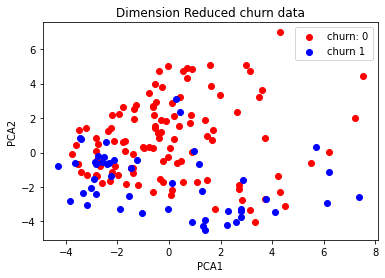

In [20]:
X1, X2 = X_train_pca[y_train == 0, 0], X_train_pca[y_train == 0, 1]
plt.scatter(X1, X2, color='r', label="churn: 0")

X1, X2 = X_train_pca[y_train == 1, 0], X_train_pca[y_train == 1, 1]
plt.scatter(X1, X2, color='b', label="churn 1")

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.title('Dimension Reduced churn data');
plt.show()